https://machinelearningmastery.com/machine-learning-in-python-step-by-step/



In [1]:
# Check the versions of libraries
 
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas as pd
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.6.5 |Anaconda, Inc.| (default, Apr 29 2018, 16:28:17) 
[GCC 7.2.0]
scipy: 1.1.0
numpy: 1.14.3
matplotlib: 2.2.2


NameError: name 'pandas' is not defined

In [41]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from scipy import stats
from statsmodels.compat import lzip
import statsmodels
import matplotlib.pyplot as plt

In [57]:
data = pd.read_csv('anderson game log.csv', header=0)
data = data.dropna()
data.head

<bound method NDFrame.head of            AGE  FG  FGA  THREEP  THREEPA  FT  FTA  ORB  DRB  TRB  AST  STL  \
0    21.115068   1    8       0        2   2    3    0    8    8    4    2   
1    21.126027   0    0       0        0   0    0    0    0    0    0    0   
2    21.128767   0    2       0        0   0    0    0    1    1    0    0   
3    21.136986   0    4       0        2   0    0    0    3    3    1    0   
4    21.145205   1    7       0        1   0    0    0    3    3    0    0   
5    21.156164   0    2       0        0   0    0    0    2    2    1    0   
6    21.158904   0    0       0        0   0    0    0    0    0    1    0   
7    21.180822   0    1       0        0   0    0    0    1    1    0    1   
8    21.183562   0    0       0        0   0    0    0    0    0    0    0   
9    21.197260   1    3       0        0   1    2    0    5    5    1    0   
10   21.208219   4    5       1        2   0    0    1    4    5    3    2   
11   21.213699   3    6       0   

In [58]:
data.corr()

,AGE,FG,FGA,THREEP,THREEPA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,PlusMinus
AGE,1.000000,0.352525,0.324645,0.143786,0.198118,0.220057,0.250685,0.372895,0.277790,0.365584,0.341646,0.307458,0.257473,0.275266,0.165132,0.380406,0.436990,0.064775
FG,0.352525,1.000000,0.838953,0.301152,0.274899,0.248496,0.303397,0.352984,0.422581,0.484905,0.463172,0.373636,0.260089,0.334323,0.332901,0.947860,0.846691,0.197909
FGA,0.324645,0.838953,1.000000,0.273166,0.439129,0.277054,0.335185,0.433232,0.519877,0.596210,0.493838,0.401391,0.285669,0.302453,0.369954,0.819258,0.685910,0.104120
THREEP,0.143786,0.301152,0.273166,1.000000,0.592017,0.007001,-0.028031,0.083085,0.221518,0.220298,0.215846,0.218067,0.165276,0.043010,0.106229,0.348609,0.383692,0.222776
THREEPA,0.198118,0.274899,0.439129,0.592017,1.000000,0.117777,0.115039,0.131317,0.281307,0.288336,0.322762,0.248452,0.170991,0.150769,0.123670,0.324157,0.306996,0.102944
FT,0.220057,0.248496,0.277054,0.007001,0.117777,1.000000,0.933337,0.103190,0.287776,0.284613,0.287016,0.166058,0.107412,0.183618,0.189592,0.531964,0.488387,0.187018
FTA,0.250685,0.303397,0.335185,-0.028031,0.115039,0.933337,1.000000,0.128559,0.287524,0.292827,0.305711,0.175096,0.157554,0.183256,0.230478,0.553265,0.485415,0.156764
ORB,0.372895,0.352984,0.433232,0.083085,0.131317,0.103190,0.128559,1.000000,0.229865,0.532366,0.302287,0.145549,0.255094,0.211358,0.117751,0.337402,0.398569,0.050551
DRB,0.277790,0.422581,0.519877,0.221518,0.281307,0.287776,0.287524,0.229865,1.000000,0.946219,0.398882,0.413804,0.252771,0.270757,0.375735,0.468342,0.550445,0.269771
TRB,0.365584,0.484905,0.596210,0.220298,0.288336,0.284613,0.292827,0.532366,0.946219,1.000000,0.447439,0.408314,0.304662,0.305767,0.365960,0.519528,0.611276,0.251453


In [59]:
# descriptions
print(data.describe())

              AGE          FG         FGA      THREEP     THREEPA          FT  \
count  257.000000  257.000000  257.000000  257.000000  257.000000  257.000000   
mean    23.036501    1.918288    4.011673    0.190661    0.564202    0.856031   
std      1.033505    1.853295    2.992807    0.412962    0.788567    1.424771   
min     21.115068    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     22.263014    0.000000    2.000000    0.000000    0.000000    0.000000   
50%     23.197260    1.000000    4.000000    0.000000    0.000000    0.000000   
75%     24.115068    3.000000    6.000000    0.000000    1.000000    2.000000   
max     24.545205    9.000000   14.000000    2.000000    4.000000    8.000000   

              FTA         ORB         DRB         TRB         AST         STL  \
count  257.000000  257.000000  257.000000  257.000000  257.000000  257.000000   
mean     1.167315    0.571984    3.007782    3.579767    1.727626    0.937743   
std      1.754242    0.9076

In [64]:
model = smf.ols("PlusMinus ~ AGE + FG + FGA + THREEP + THREEPA + FT + FTA + ORB + DRB + AST + STL + BLK + TOV + PF + PTS + GmSc", data= data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PlusMinus   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     5.125
Date:                Tue, 18 Sep 2018   Prob (F-statistic):           1.99e-08
Time:                        23:26:38   Log-Likelihood:                -903.05
No. Observations:                 257   AIC:                             1836.
Df Residuals:                     242   BIC:                             1889.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.9007     13.494      1.401      0.163      -7.680      45.482
AGE           -0.8976      0.601     -1.494      0.136      -2.081       0.286
FG            -0.8734      0.647     -1.351      0.178      -2.147       0.400
FGA           -0.8904      0.365     -2.439      0.015      -1.610      -0.171
THREEP         2.1565      1.546      1.395      0.164      -0.889       5.202
THREEPA       -0.2297      0.955     -0.241      0.810      -2.110       1.651
FT            -0.1022      0.921     -0.111      0.912      -1.917       1.713
FTA           -0.1805      0.841     -0.215      0.830      -1.836       1.476
ORB           -0.1586      0.646     -0.246      0.806      -1.430       1.113
DRB            0.5722      0.291      1.964      0.051      -0.002       1.146
AST            0.8664      0.401      2.163      0.032       0.077       1.655
STL            0.0131      0.461      0.028      0.977      -0.894       0.920
BLK           -0.9438      0.735     -1.283      0.201      -2.393       0.505
TOV           -0.4440      0.511     -0.870      0.385      -1.450       0.562
PF             0.6263      0.536      1.169      0.244      -0.429       1.682
PTS            0.3076      0.319      0.964      0.336      -0.321       0.936
GmSc           0.8260      0.231      3.583      0.000       0.372       1.280
==============================================================================
Omnibus:                        1.679   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.432   Jarque-Bera (JB):                1.460
Skew:                           0.040   Prob(JB):                        0.482
Kurtosis:                       3.360   Cond. No.                     7.28e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.06e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [65]:
model = smf.ols("PlusMinus ~ FGA + DRB + AST + GmSc", data= data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PlusMinus   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     15.41
Date:                Tue, 18 Sep 2018   Prob (F-statistic):           2.72e-11
Time:                        23:27:50   Log-Likelihood:                -908.29
No. Observations:                 257   AIC:                             1827.
Df Residuals:                     252   BIC:                             1844.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1737      0.961     -1.222      0.223      -3.066       0.718
FGA           -1.0076      0.248     -4.064      0.000      -1.496      -0.519
DRB            0.6290      0.272      2.314      0.021       0.094       1.164
AST            0.7364      0.411      1.793      0.074      -0.073       1.545
GmSc           0.7482      0.169      4.436      0.000       0.416       1.080
==============================================================================
Omnibus:                        1.709   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.426   Jarque-Bera (JB):                1.514
Skew:                           0.012   Prob(JB):                        0.469
Kurtosis:                       3.375   Cond. No.                         17.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
variablenames = data.keys()
print (variablenames)

Index(['AGE', 'FG', 'FGA', 'THREEP', 'THREEPA', 'FT', 'FTA', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', 'PlusMinus'],
      dtype='object')


In [78]:
predictor_names=['AGE', 'FG', 'FGA', 'THREEP', 'THREEPA', 'FT', 'FTA', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
       
predictor_data = data[predictor_names]

predictor_data.head()

,AGE,FG,FGA,THREEP,THREEPA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,21.115068,1,8,0,2,2,3,0,8,8,4,2,0,0,3,4
1,21.126027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,21.128767,0,2,0,0,0,0,0,1,1,0,0,1,0,1,0
3,21.136986,0,4,0,2,0,0,0,3,3,1,0,0,0,0,0
4,21.145205,1,7,0,1,0,0,0,3,3,0,0,1,1,3,2


In [79]:
outcome_name = 'PlusMinus'
outcome_data = data[outcome_name]
outcome_data = outcome_data.values.ravel()
outcome_data

array([ -4,   3,  -1, -12,  -4,   0,  -3,   3,   6,  -4,   7,   5,  -1,
       -15,  -4,   6,  11,  -7,  -2,   3,   3, -10,  -6,   6,   1,   1,
        -5,  -3,  -2,  -2,  -7,  -4,   5, -10,   3,   0,   3,  11,   1,
        -8,   2,  20,   1,  -4,  -1,  -1,   2,   2,  19,  -9,  -8,   7,
         3,   5,  28,   1,   0,   1,  -2,   9,  -2,  14,   2,   4,   7,
         0,   0,   7,   7,  -2,   5,   7,  16,  -9, -10,  10,   4,  14,
         4,   4,   1,   1, -13,   1,  -4,  16,   5,  -2,   4,  -4,   7,
        -5, -10,  -4,   3,  14, -10, -10,  -3,  -1,   1,  -5,  18,   1,
         0,  21,   0,  -8,   4,  10,  17,  -4,  -9,  23,   7,  -7,  -2,
         1,  13,  10,  -4, -11,  -2,  -3,   0,   2,   3,   2,  -5,   7,
         3,  -6,   3,  16, -10,  -1,   8,   3,  14,   6, -10,  -4,   8,
        -1,  14,  10,  -4,   3,  19,  16,  -2, -18,   4,  -4,  15,   6,
        -4,  -4,  -1,  -1,  -6,  12,   0,   0,  -7,  14,  20,  -2,  -1,
         3,   2,   5,  -6,   9, -10,  -8,  24,  -4,   0,  16,  -

In [80]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=50,
                              max_features= .90,
                              max_depth = None,
                              min_samples_split = 2)

In [81]:
model.fit (X= predictor_data, y = outcome_data)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.9, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [82]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

folds = len(predictor_data)
scores = cross_val_score(model, predictor_data, outcome_data, cv=folds, scoring="neg_mean_absolute_error")

In [83]:
scores

array([-12.18,  -3.44,  -0.42, -10.76,  -1.56,  -2.14,  -5.16,  -3.02,
        -6.62,  -7.02,  -0.64,  -1.9 ,  -1.5 , -26.26,  -3.  ,  -2.44,
       -10.04, -10.02,  -0.16,  -8.82,  -6.12, -10.82,  -5.8 ,  -7.88,
        -1.08,  -3.42,  -4.14,  -1.88,  -3.34,  -0.68,  -3.52,  -4.7 ,
        -6.62, -10.16,  -4.  ,  -1.86,  -3.82, -13.92,  -2.78,  -7.32,
        -1.14, -10.82,  -0.18,  -2.08,  -4.28,  -3.84,  -3.38,  -5.62,
       -12.54, -17.08,  -8.7 ,  -2.88,  -1.64,  -4.9 , -26.04,  -1.44,
        -2.36,  -1.56,  -8.24,  -7.68,  -0.74, -11.62,  -3.64,  -3.68,
        -1.08,  -2.22,  -0.12,  -6.5 ,  -0.72,  -1.38,  -5.36,  -0.92,
        -8.52,  -7.4 , -14.26,  -7.94,  -0.56,  -4.92,  -3.8 ,  -1.9 ,
        -1.08,  -0.58, -13.06, -10.26,  -3.54, -11.66,  -7.46,  -7.72,
        -7.38,  -4.12,  -7.86,  -6.82,  -9.62,  -6.34,  -5.38, -12.86,
       -16.4 , -11.74,  -0.8 ,  -0.14,  -3.58, -10.94, -10.12,  -0.54,
        -1.2 , -12.08,  -8.84,  -6.22,  -0.86,  -9.58,  -5.14,  -8.1 ,
      

In [84]:
import numpy

print ("Average Prediction Error:")
average_mean_absolute_error = numpy.mean(scores)
print (average_mean_absolute_error)

print ("Standard Deviation of Errors:")
mean_absolute_error_std = numpy.std(scores)
print (mean_absolute_error_std)

Average Prediction Error:
-6.838832684824903
Standard Deviation of Errors:
5.739963004329538


<function matplotlib.pyplot.show(*args, **kw)>

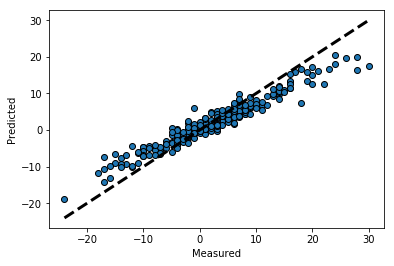

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
predicted = model.predict(predictor_data)
ax.scatter(outcome_data, predicted, edgecolors=(0, 0, 0))
ax.plot([outcome_data.min(), outcome_data.max()], [outcome_data.min(), outcome_data.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show

In [86]:
importances = model.feature_importances_
predictors = list(predictor_data)
zip(predictors,importances)

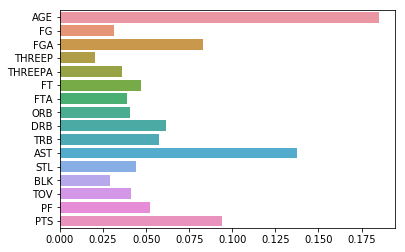

In [87]:
%matplotlib inline
import seaborn
seaborn.barplot(x=importances, y=predictors)

In [35]:
person1 = numpy.array(predictor_data.loc[0]).reshape(1,-1)

In [39]:
model.predict(person1)

array([-0.2])

In [ ]:
y_pred = regressor.predict(X_test)

In [37]:
feature_import = pd.DataFrame(data=regressor.feature_importances_, index=X_scaled.columns.values, columns=['values'])
feature_import.sort_values(['values'], ascending=False, inplace=True)
feature_import.transpose()

NameError: name 'regressor' is not defined

In [31]:
updated_model = RandomForestRegressor(n_estimators=1000,
                                      max_features = .70,
                                      max_depth = 4,
                                      min_samples_split = 2)

In [34]:
updated_predictor_data = predictor_data.copy()
updated_predictor_data.drop('3P', inplace=True, axis=1)
updated_predictor_data.drop('FG', inplace=True, axis=1)
updated_predictor_data.drop('FTA', inplace=True, axis=1)
updated_predictor_data.drop('BLK', inplace=True, axis=1)
updated_predictor_data.drop('TOV', inplace=True, axis=1)

updated_predictor_data.head()

,Age,FGA,3PA,FT,ORB,DRB,TRB,AST,STL,PF,PTS
0,24.07,9,1,1,0,9,9,1,0,1,12
1,24.07,7,0,0,2,6,8,1,0,0,4
2,24.08,9,1,2,2,2,4,1,0,4,10
3,24.08,8,0,4,1,9,10,2,1,1,12
4,24.09,4,0,2,3,3,6,3,1,1,4
